<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Олег! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error as mse

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from catboost import CatBoostRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [6]:
# data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None
                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Файл загружен. Но можно сразу  загрузить его так, чтобы дата стала индексом. Нужно просто добавить аргументов.

    data = pd.read_csv('путь к файлу',parse_dates=[0], index_col=[0])
</div>

<span style='background-color:#6666CD'>Дмитрий, привет! Спасибо за подсказку. Я до этого видел такую возможность, но зачастую делаю проверенным методом, чтобы сэкономить время))) Надо себя приучать к новым путям))

In [8]:
#data = data.set_index(['datetime'])#, inplace=True)
data = data.resample('1H').sum()
print(data)

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
...                         ...
2018-08-31 19:00:00         136
2018-08-31 20:00:00         154
2018-08-31 21:00:00         159
2018-08-31 22:00:00         223
2018-08-31 23:00:00         205

[4416 rows x 1 columns]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

## Анализ

In [33]:
data.describe()

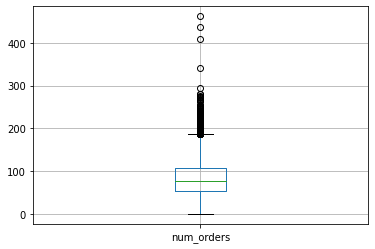

In [46]:
data.boxplot()

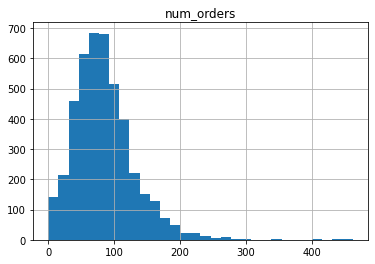

In [47]:
data.hist(bins=30) # выборка со смещением право

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я думаю что гистограма в случае временых рядов это не самый лучший инструмент. Как и "ящик с усами". Дело в том, что мы имеем какое-то распределение, характеристики которого меняются со временем. И по опыту я могу предположить, что данное распределение не является нормальным, а скорее всего является распределением Пуассона (счетчиком событий).  
    
    
В наших данных присутствует тренд (количество поездок постоянно растет) и если бы я ловил "выбросы" то только рассчитывая характеристики распределения (распределение Пуассона задается только средним) за какой-то относительно  небольшй промежуток, например 2 недели и оценивал вероятность того,  что каждое новое событие принадлежит нашему распределению.
    
    
Но даже исползование ящика с усами "по месяцам" покажет тебе, что выпадающих значений не так уж и много, как если ты смотришь их за весь период.    
</div>

In [52]:
q_1 = data.quantile(0.25)
q_3 = data.quantile(0.75)
iqr = q_3 - q_1
print('Нижняя граница выбросов', q_1 - 1.5*iqr)
print('Верхняя граница выбросов', q_3 + 1.5*iqr)

В результате расчетов мы получили границы определения выбросов для смещенного распределения датасета. Верхняя граница составляет 187 заказов. В датасете присутствуют значения больше.  

In [54]:
data.query('num_orders > 187')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Выше я написал тебе почему выбросы, диагностированные тобой таковыми не являются. Более того, диагностировав выбросы мы должны понять, почему они возникли, а не сразу удалять их. Даже в нормальном распределении небольшой процент событий, принадлежащих этому распределению будет показан как выброс. 
    
А во временых рядах точно не стоит ничего удалять. Учитывая проводимую постобработку мы просто получим дыры (нули). Разумным значением при обнаружении действительно эксремальных значений или ошибок могло бы быть заменой их средним/максимальным по ряду.    

</div>

 <span style='background-color:#6666CD'> Ошибку понял. Для временных рядов не применяем стандартные методы борьбы с выбросами. Удалю ниже код "борьбы с выбросами". При прохождении этого спринта я вообще не увидел описание борьбы с выбросами и предположил, что действуем по стандартной схеме. Попробую провести анализ временного ряда, как ты написал ниже

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> исправлено </div>

В данной ситуации сложно понять могло ли быть такое количество заказов. По результатам статистического анализа все значения больше 187 это выбросы и мы должны их удалить или скорректировать. В датасете таких значений всего  117. Их удаление не должно привести к большой потере данных.

In [4]:
# data = data.drop(data[data['num_orders']>187].index) # удаляем значения больше 187
# data[data['num_orders']>187].sum() # проверка

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Провередны тобой анализ не опирается на специфику спринта, а мы изучаем временные ряды. Прошу тебя провести анализ с использованием рассмотренного в спринте инструментария:
    
 - Построить график исходного временного ряда. Можно на ложить на него график скользящего среднего за сутки/неделю.
    
 - Прошу исследовать тренды и сезонность, имеющиеся в наших данных.   
 - Найденные результаты нужно сформулировать в выводах в конце раздела.
    

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> исправлено </div>

Построим графики, описывающие наш временной ряд

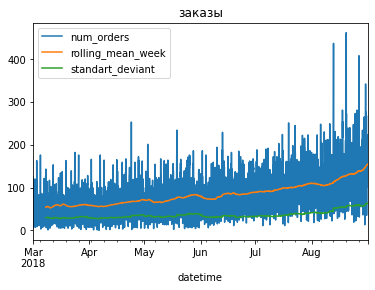

In [9]:
data['rolling_mean_week'] = data.rolling(24*7).mean()
data['standart_deviant'] = data['num_orders'].rolling(24*7).std()
data.plot(title='заказы')
data = data.drop('rolling_mean_week',axis=1)
data = data.drop('standart_deviant',axis=1)

<AxesSubplot:title={'center':'шум'}, xlabel='datetime'>

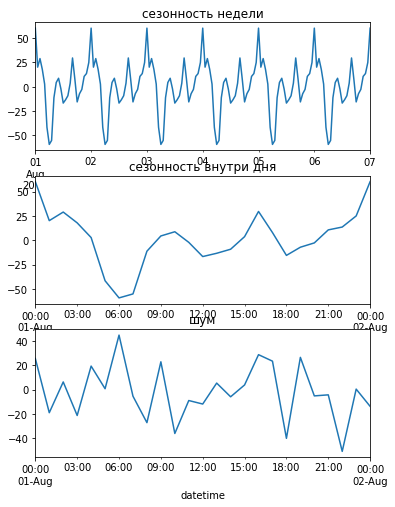

In [19]:
plt.figure(figsize=(6, 8))

decomposed = seasonal_decompose(data)

plt.subplot(311)
decomposed.seasonal['2018-08-01 00:00:00':'2018-08-07 00:00:00'].plot(title='сезонность недели')
plt.subplot(312)
decomposed.seasonal['2018-08-01 00:00:00':'2018-08-02 00:00:00'].plot(title='сезонность внутри дня')
plt.subplot(313)
decomposed.resid['2018-08-01 00:00:00':'2018-08-02 00:00:00'].plot(title='шум')

# ax=plt.gca()

<AxesSubplot:title={'center':'тренд всего периода'}, xlabel='datetime'>

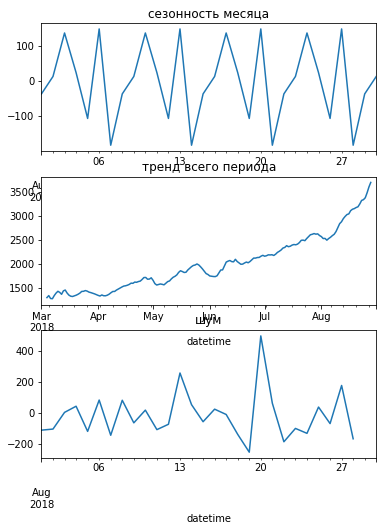

In [20]:
data_per_day = data.resample('1D').sum()

plt.figure(figsize=(6, 8))

decomposed = seasonal_decompose(data_per_day)

plt.subplot(311)
decomposed.seasonal['2018-08-01 00:00:00':'2018-08-30 00:00:00'].plot(title='сезонность месяца')
#plt.subplot(310)
#decomposed.trend['2018-08-01 00:00:00':'2018-08-07 00:00:00'].plot(title='тренд недели')
plt.subplot(313)
decomposed.resid['2018-08-01 00:00:00':'2018-08-30 00:00:00'].plot(title='шум')
plt.subplot(312)
decomposed.trend.plot(title='тренд всего периода')


# ax=plt.gca()

<AxesSubplot:title={'center':'сезонность недели'}, xlabel='datetime'>

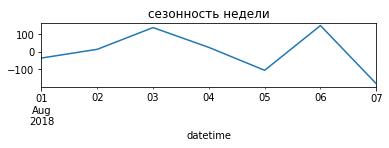

In [15]:
plt.subplot(311)
decomposed.seasonal['2018-08-01 00:00:00':'2018-08-07 00:00:00'].plot(title='сезонность недели')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
    
ОК, рассмотрение коротких промужутков времени (день, неделя) для анализа сезонности это абсолютно  нормально. Но тренд  нужно рассматривать на всем временном промежутке. Давай вспомним, что такое тренд - долгосрочное изменение уровня ряда. Т.е. мы рассматриваем тренд на всем периоде даных и делаем вывод о изменении некоорого базового "среднего" уровня. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v3</b> Выполнено </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

<span style='background-color:#6666CD'> 1. Дмитрий, попробовал визуализировать датасет. Какие выводы я могу сделать... Судя по первому графику мы видим наличие восходящего тренда в течение года. Я думаю на последнем отрезке мы имеем выбросы (тестовая выборка). Значения превосходят стандартное отклонение. Однако, должны ли мы руководствоваться првилом о 3ех стандарных отклонениях?.. Мы имеем суточную и недельную сезонность. Согласно графикам пик заказов приходиться на утро перед началом рабочего дня и время в промежутке 16-17. Недельный пик - понедельник и пятница.\
        2. Дмитрий, прошу помочь советом. Как отобразить на графике не календарные дни, а дни недели. Полагаю, что они в нашем случае информативны для анализа. \
        3. Не понял как интерпретировать шум. Полезен ли он для нашего анализа? Есть ли связь шума с выбросами?

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

То, что остается от нашего ряда после того, как мы выделили сезонность и тренды - это остатки. В данном случае мы никак не сможем их интерпретировать.  А вот если мы получили предсказание с помощью какой-либо модели и в остатках увидели какую-то структуру, то возможно имеет смысл дообучить исходную модель или использовать другую модель, которую обучить на остатках (по аналогии с бустингом). 


По твоему вопросу. Каких-либо легких способов сделать это я не не нашел. Поэтому самое простое - это заглянутьт в календарь )) или посмотреть в index.dayofweek. Или включать всю силу matplotlib и вспоминать как строить графики
    
    
 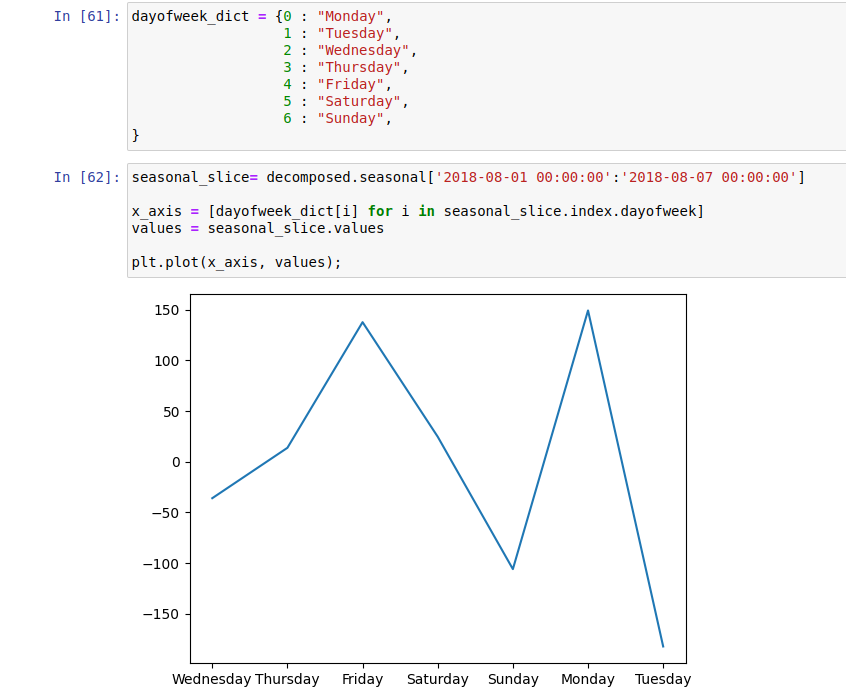
    
    


</div>

Подготовим данные для обучения

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Конструирование признаков не относится к анализу, это уже часть, связанная с обучением моделей.
</div>

<span style='background-color:#6666CD'> ок, понял

In [21]:
data['dayofweek'] = data.index.dayofweek
data['hour']= data.index.hour

data = data.sort_index() # отсортируем датасет по датам

def set_features(rolling_step, lag):
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_step).mean()
    for lag in range(1, lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag, fill_value=0)
    return data


set_features(168, 24)
data = data.fillna(0)
data

,num_orders,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-03-01 01:00:00,85,3,1,0.000000,124,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-03-01 02:00:00,71,3,2,0.000000,85,124,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-03-01 03:00:00,66,3,3,0.000000,71,85,124,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-03-01 04:00:00,43,3,4,0.000000,66,71,85,124,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,4,19,154.297619,207,217,197,116,133,166,...,268,99,230,194,276,246,158,198,142,72
2018-08-31 20:00:00,154,4,20,154.434524,136,207,217,197,116,133,...,78,268,99,230,194,276,246,158,198,142
2018-08-31 21:00:00,159,4,21,154.285714,154,136,207,217,197,116,...,35,78,268,99,230,194,276,246,158,198


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь день недели, в данных есть недельная сезонность.
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В наших данных наблюдается очень четкая сезонность внутри дня. Рекомендую использовать информацию о часе в качестве признака.

</div>

<span style='background-color:#6666CD'> Спасибо. Добавил. Не подумал об этом 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Предлагаю удалить признак "день", т.к. сезонность внутри месяца мы не обнаружили.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарные признаки "месяц" и "год" лучше удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<span style='background-color:#6666CD'> Дмитрий, начинаю лучше понимать процедуру с учетом твоих замечаний. Спасибо! Удалил год, месяц и день. Однако для меня всегда было вопросом!!! Если мы оставим эти признаки, что будет? Модель не определит слабую корреляцию этих признаков с целевым показателем? Качество модели снизится?

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Я думаю  что модель найдет кореляцию между признаком месяц и уровнем , ведь тренд который мы увидели отдалено похож на линейный.  Но данная кореляция это просто кореляция, но не причинно-следственная связь. Соответственно наша</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Совет: Гиперпараметры rolling_step, lag очень важны. Не обязательно подбирать их автоматически, но рекомендую посмотреть разные значения. С их ростом заметно улучшаются качество моделей. И в этом есть логика. Например, среднее по скользящему окну - это составляющая чистого тренда. 
    

    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Выбор  rolling_step, lag равный 5 часам никак не согласуется с тем, что мы работаем с временем. В сутках 24 часа, в неделе 168. Учитывая что в данных есть суточная и недельная сезонности лучше брать эти значения кратные суткам (нескольким суткам, неделе). Но беря усреднение за 5 часов ты не поможешь модели учиться, да и отстающих значений будет маловато. 

</div>

In [22]:
features = data.drop('num_orders', axis=1)
target = data['num_orders']

train_features, test_features, train_target, test_target = train_test_split(
                        features, target, test_size=0.1, random_state=12345, shuffle=False) 



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При разделении на выборки данные перемешиваются, что не соотвтствует специфике временых рядов. Пожалуйста, используй shuffle=False</div>


<span style='background-color:#6666CD'> Упустил момент 😖

## Обучение

Обучим дерево решений

In [23]:
%%time

model=DecisionTreeRegressor(random_state=12345)
grid_params = {'max_depth': range(1,6)}
my_cv = TimeSeriesSplit(n_splits=5)
grid_tree = GridSearchCV(model, grid_params, scoring = 'neg_root_mean_squared_error', cv = my_cv)
grid_tree.fit(train_features, train_target)

CPU times: user 391 ms, sys: 0 ns, total: 391 ms
Wall time: 391 ms


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 6)},
             scoring='neg_root_mean_squared_error')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

    tscv = TimeSeriesSplit(n_splits=5)
    gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
    gsearch.fit(X, y)

<span style='background-color:#6666CD'> Блин, столько нюансов 😖...А мне этот спринт сначала показался таким легким))))

In [24]:
best_model = pd.DataFrame(np.zeros((4, 2)))
best_model.iloc[0,0] = 'tree'
best_model.iloc[0,1] = grid_tree.best_score_
best_model

,0,1
0,tree,-29.978956
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000


Обучим модель леса решений

In [25]:
%%time

model=RandomForestRegressor(random_state=12345)
grid_params = {'max_depth': range(1,6), 'n_estimators': range(1, 101, 10)}
grid_forest = GridSearchCV(model, grid_params, scoring = 'neg_root_mean_squared_error', cv = my_cv)
grid_forest.fit(train_features, train_target)

CPU times: user 1min 28s, sys: 413 ms, total: 1min 28s
Wall time: 1min 29s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': range(1, 101, 10)},
             scoring='neg_root_mean_squared_error')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже проблема с утечками при кросс-валидации</div>


In [26]:
best_model.iloc[1,0] = 'forest'
best_model.iloc[1,1] = grid_forest.best_score_
best_model

,0,1
0,tree,-29.978956
1,forest,-26.886327
2,0.0,0.000000
3,0.0,0.000000


Обучим линейную регрессию

In [27]:
%%time

model=LinearRegression()
#grid_params = {'learning_rate' :}
grid_regression = GridSearchCV(model, {}, scoring = 'neg_root_mean_squared_error', cv = my_cv)
grid_regression.fit(train_features, train_target)

CPU times: user 494 ms, sys: 611 ms, total: 1.1 s
Wall time: 1.03 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LinearRegression(), param_grid={},
             scoring='neg_root_mean_squared_error')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже проблема с утечками при кросс-валидации</div>


In [28]:
best_model.iloc[2,0] = 'regression'
best_model.iloc[2,1] = grid_regression.best_score_
best_model

,0,1
0,tree,-29.978956
1,forest,-26.886327
2,regression,-27.268833
3,0.0,0.000000


Обучим модель градиентного бустинга

In [29]:
model = CatBoostRegressor(random_state=12345)
grid_params = {'max_depth': range(1,6), 'n_estimators': range(1, 101, 10)}
grid_boosting = GridSearchCV(model, grid_params, scoring = 'neg_root_mean_squared_error', cv = my_cv)
grid_boosting.fit(train_features, train_target)

Learning rate set to 0.5
0:	learn: 26.9756507	total: 46.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 27.5901121	total: 881us	remaining: 0us
Learning rate set to 0.5
0:	learn: 28.7118902	total: 713us	remaining: 0us
Learning rate set to 0.5
0:	learn: 29.8397977	total: 1.12ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 31.0026288	total: 993us	remaining: 0us
Learning rate set to 0.5
0:	learn: 26.9756507	total: 513us	remaining: 5.13ms
1:	learn: 24.9222346	total: 939us	remaining: 4.22ms
2:	learn: 23.7319479	total: 1.27ms	remaining: 3.39ms
3:	learn: 22.5313100	total: 1.63ms	remaining: 2.86ms
4:	learn: 21.9090785	total: 2ms	remaining: 2.4ms
5:	learn: 21.5357781	total: 2.38ms	remaining: 1.98ms
6:	learn: 21.0196339	total: 2.78ms	remaining: 1.59ms
7:	learn: 20.7529617	total: 3.23ms	remaining: 1.21ms
8:	learn: 20.5616696	total: 3.73ms	remaining: 828us
9:	learn: 20.4676061	total: 4.29ms	remaining: 428us
10:	learn: 20.2479545	total: 4.72ms	remaining: 0us
Learning rate set to 0.5
0:	le

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fd7e0580850>,
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': range(1, 101, 10)},
             scoring='neg_root_mean_squared_error')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь тоже проблема с утечками при кросс-валидации</div>


In [30]:
best_model.iloc[3,0] = 'boosting'
best_model.iloc[3,1] = grid_boosting.best_score_
best_model

,0,1
0,tree,-29.978956
1,forest,-26.886327
2,regression,-27.268833
3,boosting,-25.377347


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Несмотра на красные комментарии хочу похвалить за правильное использование поиска по сетке в части .best_score_ и корректной метрики neg_root_mean_squared_error </div>

<span style='background-color:#6666CD'> Спасибо))) Я старался... Думал будет первый проект без ошибок и тут на тебе :))))

В результате анализа выделили лучшую модель. Это бустинг

## Тестирование

Протестируем лучшую модель

In [31]:
predictions = grid_boosting.predict(test_features)
RMSE = mse(test_target, predictions)**0.5
RMSE

45.91105989857126

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 
</div>

Выводы: среднеквадратическая ошибка на тестовой выборке 46, что ниже порога по условиям. Успех!)))
Мы можем использовать градиентный бустинг для прогнозирования спроса на следубщий час

ВОПРОС: Прошу чуть помочь в понимании создания признаков для временных моделей. Скользящее среднее мне более понятно. Здесь усредняются значения на нескольких шагах и сглаживаются "скачки". 
А вот с признаком lag я пока в прострации. Как он помогает в построении модели...

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> ответ ревьюера v2</b>

Здесь возможно два уровня понимания:

  - Во первых мы можем просто запомнить, что отстающие значения помогают. Можешь это проверить экспериментально, взяв 24 и 168 отстающих значений.
    
  - А чтобы понять, как оно работает "под капотом" и какая там математика, есть смысл познакомиться с аналогичным подходм, используемым в авторегрессионных моделях. Подход другой, "классический", но математика от этого не меняется. Я дам его тебе в доп. материалах.  
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Дополнительные материалы </b>

Если решишь глубже погрузиться в тему временных рядов, думаю тебе стоит знать что подход, изученный в курсе далеко не единственный. Вот к чему возможно стоит обратиться:
 - Авторегрессионные модели семейства ARIMA. В качестве экскурса очень полезно следующее видео: https://www.youtube.com/watch?v=u433nrxdf5k&t=110s
 - Библиотека prophet от Facebook. По моим наблюдениям, качество решения этой моделью ниже, но она очень проста в применении. https://habr.com/ru/company/ods/blog/323730/
    
 - Урок по временным рядам из курса ML от ODS (https://habr.com/ru/company/ods/blog/327242/)   


</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Хотелось бы начать с похвалы, но приходится констатировать главное - в данном проекте ты почти не используешь материал спринта и нигде не используется специфика временных рядов. 
    
Создается ощущение, что в целом ты очень хорошо разобрался с машинным обучением и этот проект делал по привычному сценарию, не до конца разобравшись в специфике предметной области. Возможно просто не хватило времени перед Новым Годом.
    
Что нужно обязательно доработать:
    
  - не нужно ничего удалять из временого ряда
  - построить график исходного временного ряда
  - сделать декомпозицию на сезонность и тренд
  - нужно удалить календарные признаки месяц и год
  - при разделении данных на выборки данные нельзя перемешивать
  - при использовании кросс-валидации обучающая и валидационная выборка должны идти друг за другом, но не перемешиваться (используем TimeSeriesSplit)
 
    
Желтые комментарии на твое усмотрение.
    
Жду твой проект на финальное ревью :)
</div>

<span style='background-color:#6666CD'> Признаю, что действовал немного шаблонно (а может не немного:)). На самом деле я не совсем ухватил момент с анализом из этой темы... тренд, сезонность. Я так теперь понимаю, что мы не создаем признаки по всем хронологическим параметрам (час, день, неделя, месяц, год), как я думал... а используем этот инструмент для выбора признаков (я уже задавал вопрос про корреляцию нерелевантных признаков с целевым и влияния их на качество модели (выше)). Про выбросы в спринте не было ничего и я ошибочно подумал бороться "по накатанной". Но опять же выше написал вопрос пр шум...Это как то связано с выбросами? Как мы интерпретируем это?\
    Потерял какие то нюансы (shuffle), а о каких то и не подумал (cv в кросс валидации).\
    Ты мне очень помог уложить материал в голове. Спасибо!\
        Теперь буду ждать повторной проверки и почитаю факультатив от тебя

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Привет! 

Вижу что ты провел содержательную работу над ошибками и всё исправлено.

Но пожалуйста выведи график тренда за пол года, а не за сутки/неделю. Тренд, в отличие от сезонности информативен на больших периодах.

В остальном все ОК и после вывода тренда проект будет принят.
</div>

<span style='background-color:#6666CD'>  Вывел график тренда за весь период взамен недельным данным. На самом деле изначально я этого не сделал в виду того, что тренд отображен на 1ом графике через скользящую среднюю.\
    Есть ли разница в выведении тренда через rolling().mean() и инструментом decompose?\
        В остальном, спасибо за помощь в спринте. Теперь мне тема стала понятнее

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v3</b>

На этот раз все ОК,  нужный график выведен и проект может быть принят.

Отвечая на твой вопрос - оба инструмента позволяют увидеть тренд как долгосрочную тенденци. Однако это разный инструментарий (как с точки зрения использования, так и внутренних механизмов). Поэтому целесообразно освоить оба. 

Проект принят. Поздравляю и желаю дальнейших успехов!
    
С наступающим Новым годом!    
</div>